# Mobile Price Classification

#### About the dataset
A mobile phone, cell phone, cellphone, or hand phone, sometimes shortened to simply mobile, cell or just phone, is a portable telephone that can make and receive calls over a radio frequency link while the user is moving within a telephone service area.

The first handheld mobile phone was demonstrated by John F. Mitchell and Martin Cooper of Motorola in 1973, using a handset weighing c. 2 kilograms (4.4 lbs).

In 1979, Nippon Telegraph and Telephone (NTT) launched the world's first cellular network in Japan. In 1983, the DynaTAC 8000x was the first commercially available handheld mobile phone. From 1983 to 2014, worldwide mobile phone subscriptions grew to over seven billion—enough to provide one for every person on Earth.

In first quarter of 2016, the top smartphone developers worldwide were Samsung, Apple, and Huawei, and smartphone sales represented 78 percent of total mobile phone sales. For feature phones (or "dumbphones") as of 2016, the largest were Samsung, Nokia, and Alcatel.

#### Objective
We aim to analyze mobile phone features with price range 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost). 

We will implement the following models to classify the price range for the mobile phones:
- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- Gradient Boosting Classifier
- Support Vector Classifier

#### Features

**1. battery_power**: Total energy a battery can store in one time measured in mAh

**2. blue**: Has bluetooth or not

**3. clock_speed**: speed at which microprocessor executes instructions

**4. dual_sim**: Has dual sim support or not

**5. fc**: Front Camera mega pixels

**6. four_g**: Has 4G or not

**7. int_memory**: Internal Memory in Gigabytes

**8. m_dep**: Mobile Depth in cm

**9. mobile_wt**: Weight of mobile phone

**10. n_cores**: Number of cores of processor

**11. pc**: Primary Camera mega pixels

**12. px_height**: Pixel Resolution Height

**13. px_width**: Pixel Resolution Width

**14. ram**: Random Access Memory in Mega Bytes

**15. sc_h**: Screen Height of mobile in cm

**16. sc_w**: Screen Width of mobile in cm

**17. talk_time**: longest time that a single battery charge will last when you are

**18. three_g**: Has 3G or not

**19. touch_screen**: Has touch screen or not

**20. wifi**: Has wifi or not

**21. price_range**: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [119]:
# Read data
mobile_train = pd.read_csv('Data/train.csv')
mobile_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [120]:
mobile_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Few of the features, such as **blue**, **dual_sim**, **four_g**, **three_g**, **touch_screen**, **wifi** are already one-hot encoded. 

In [138]:
# Shape
mobile_train.shape

(2000, 21)

In [121]:
print('total_null: ', mobile_train.isna().sum())
print('total_count: ', mobile_train.count())

total_null:  battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64
total_count:  battery_power    2000
blue             2000
clock_speed      2000
dual_sim         2000
fc               2000
four_g           2000
int_memory       2000
m_dep            2000
mobile_wt        2000
n_cores          2000
pc               2000
px_height        2000
px_width         2000
ram              2000
sc_h             2000
sc_w             2000
talk_time        2000
three_g          2000
touch_screen     2000
wifi             2000
price_range      2000
dtype: int64


In [122]:
# Missing value inspection
def missing_values(df):
    total_null = df.isna().sum()
    percent_null = df.isna().sum() / df.count()
    missing_data = pd.concat([total_null, percent_null], axis = 1, keys = ['Total missing values', 'Percentage missing values']).sort_values('Total missing values', ascending = False)
    return missing_data

missing_values(mobile_train)

,Total missing values,Percentage missing values
battery_power,0,0.0
px_height,0,0.0
wifi,0,0.0
touch_screen,0,0.0
three_g,0,0.0
talk_time,0,0.0
sc_w,0,0.0
sc_h,0,0.0
ram,0,0.0
px_width,0,0.0


Text(0.5, 1.0, 'Correlation Matrix')

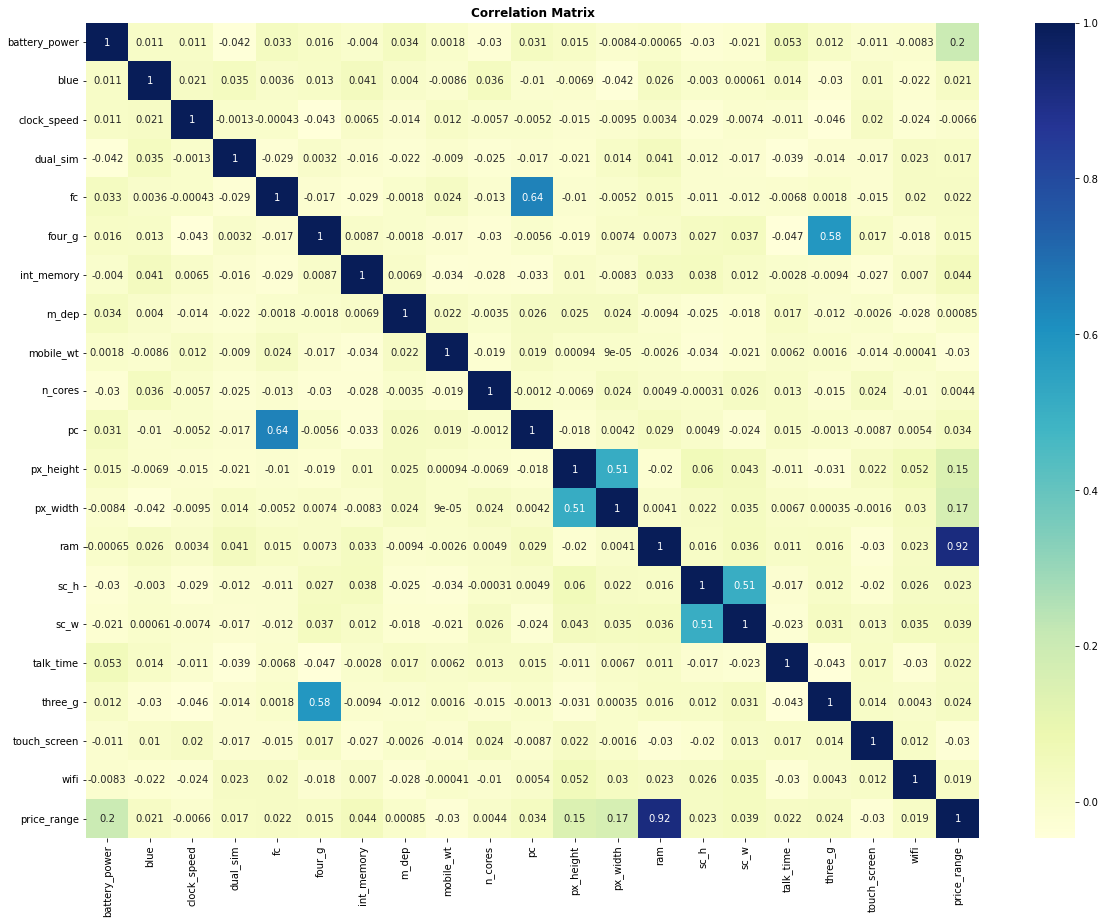

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
correlation_matrix = mobile_train.corr(method = 'pearson')

# Heatmap
fig = plt.figure(figsize=(20,15)) # Set size
sns.heatmap(correlation_matrix, annot = True, cmap = "YlGnBu")
plt.title("Correlation Matrix", size = 12, weight = 'bold')

- `RAM` has high positive correlation to price_range
- Other features that have a positive correlation
    - `battery_power`
    - `px_width, px_height`
- Features with high correlation to each other
    - `fc(front camera) to pc(primary camera)`
    - `three_g to four_g`
    - `px_height(pixel resolution height) to px_width(pixel resolution width)`
    - `sc_h(screen height) to sc_w(screen width)`

In [124]:
# Sorting the correlation values
correlation_matrix.sort_values(by = ['price_range'], ascending = False).iloc[0].sort_values(ascending = False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

In [125]:
# Report view
report = mobile_train.describe().T # Transpose index and columns
# Put report in a dataframe
report_df = pd.DataFrame( index = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 
                                   'fc', 'four_g', 'int_memory', 'm_dep','mobile_wt', 
                                   'n_cores', 'pc', 'px_height', 'px_width', 'ram', 
                                   'sc_h', 'sc_w', 'talk_time', 'three_g','touch_screen',
                                   'wifi', 'price_range'], 
                         columns = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], 
                         data = report)

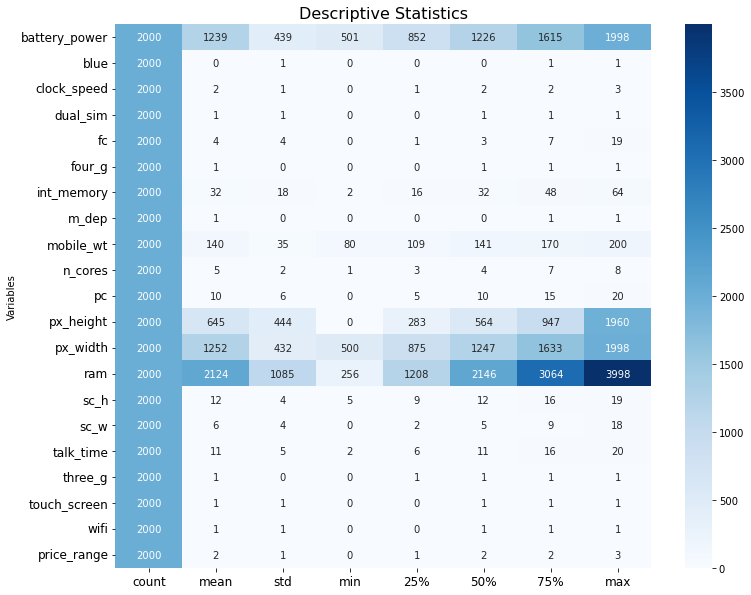

In [126]:
# Plot the report
f,ax = plt.subplots(figsize=(12,10))
# Heatmap
sns.heatmap(report_df, annot=True,cmap = "Blues", fmt= '.0f')
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("Variables")
plt.title("Descriptive Statistics", size = 16)
plt.show()

## Exploratary Data Analysis

Distribution of top 3 strongly correlated features:
- battery_power
- ram
- px_width and px_height

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


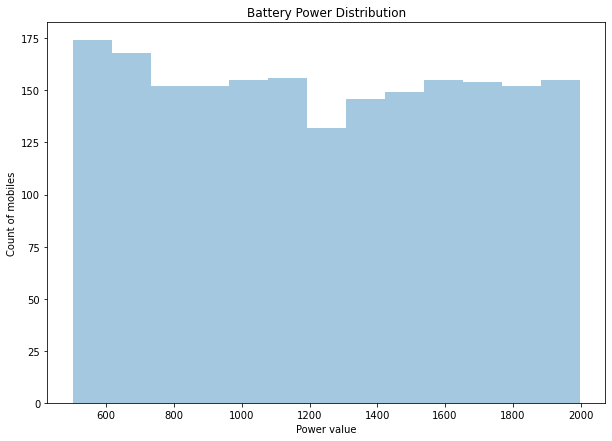

In [127]:
# Understanding battery_power distribution
sns.distplot(mobile_train.battery_power, bins = 'auto', kde = False)
# Labelling
plt.title('Battery Power Distribution')
plt.xlabel('Power value')
plt.ylabel('Count of mobiles')
# Set size for plot
fig = plt.gcf()
fig.set_size_inches(10,7)

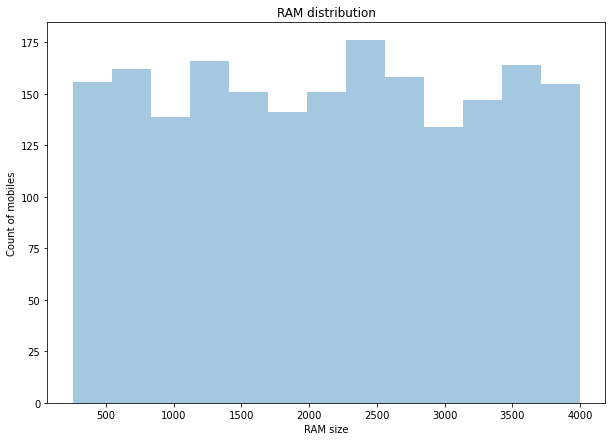

In [128]:
# Understanding ram distribution
sns.distplot(mobile_train.ram, bins = 'auto', kde = False)
plt.title('RAM distribution')
plt.xlabel('RAM size')
plt.ylabel('Count of mobiles')
fig = plt.gcf()
fig.set_size_inches(10, 7)

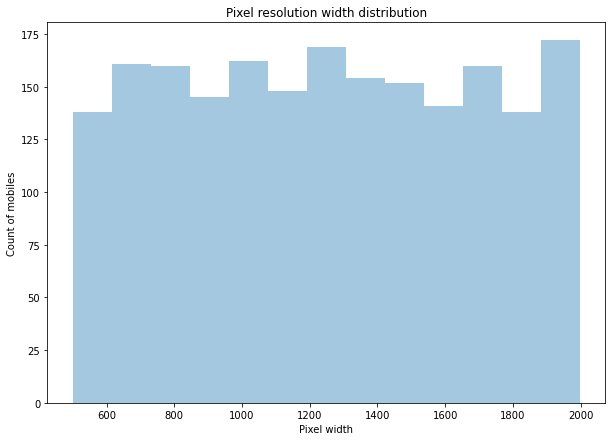

In [129]:
# Understanding px_width and px_width distribution

# px_width
sns.distplot(mobile_train.px_width, bins = 'auto', kde = False)
plt.title('Pixel resolution width distribution')
plt.xlabel('Pixel width')
plt.ylabel('Count of mobiles')
fig = plt.gcf()
fig.set_size_inches(10, 7)

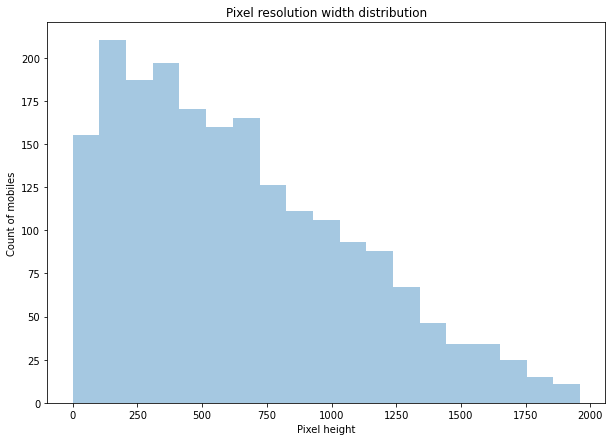

In [130]:
# px_height
sns.distplot(mobile_train.px_height, bins = 'auto', kde = False)
# Labeling
plt.title('Pixel resolution width distribution')
plt.xlabel('Pixel height')
plt.ylabel('Count of mobiles')
fig = plt.gcf()
fig.set_size_inches(10, 7)

#### 1. Price_range

In [131]:
# Class count in price_range (response variable)
print('Types of ranges(classes) noted in response variable:')
print(mobile_train.price_range.value_counts())

Types of ranges(classes) noted in response variable:
1    500
2    500
3    500
0    500
Name: price_range, dtype: int64


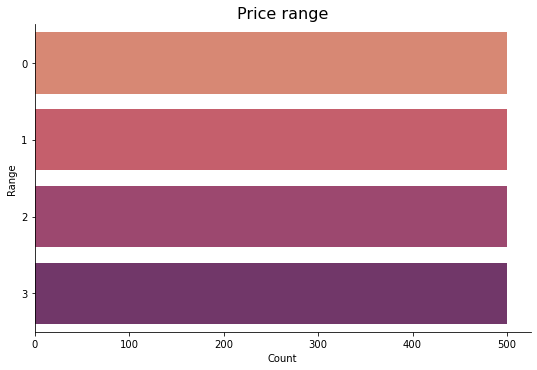

In [132]:
# Catplot ==> shows the relationship between a numerical and one or more categorical variables
sns.catplot( y = 'price_range', kind = 'count', data = mobile_train, orient = "v", palette = 'flare')
# Labelling
plt.title('Price range', size = 16)
plt.xlabel('Count')
plt.ylabel('Range')
# Setting size of plot
fig = plt.gcf()
fig.set_size_inches(8,5)

#### 2. RAM - Price_range

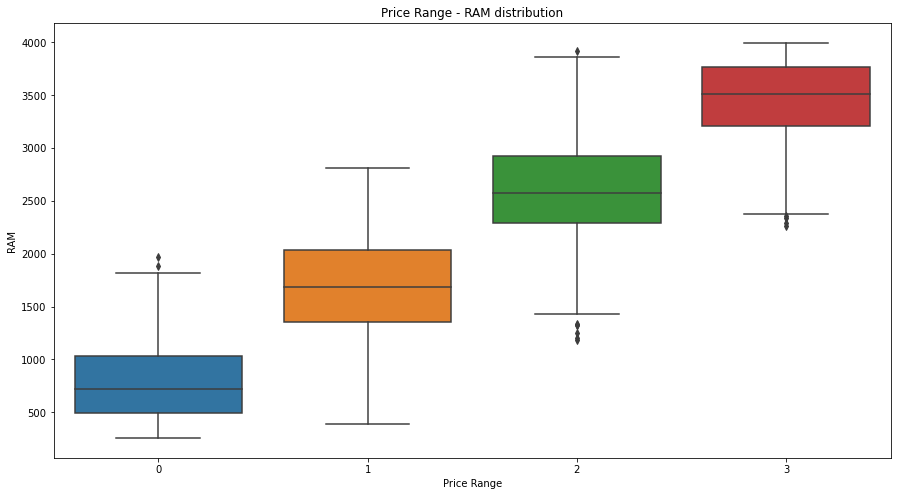

In [133]:
# Boxplot for RAM vs. Price_Range
sns.boxplot(x = 'price_range', y = 'ram', data = mobile_train)
# Plot labelling
plt.title('Price Range - RAM distribution')
plt.xlabel('Price Range')
plt.ylabel('RAM')
# Setting size of plot
fig = plt.gcf()
fig.set_size_inches(15,8)

#### 3. Battery power - Price Range

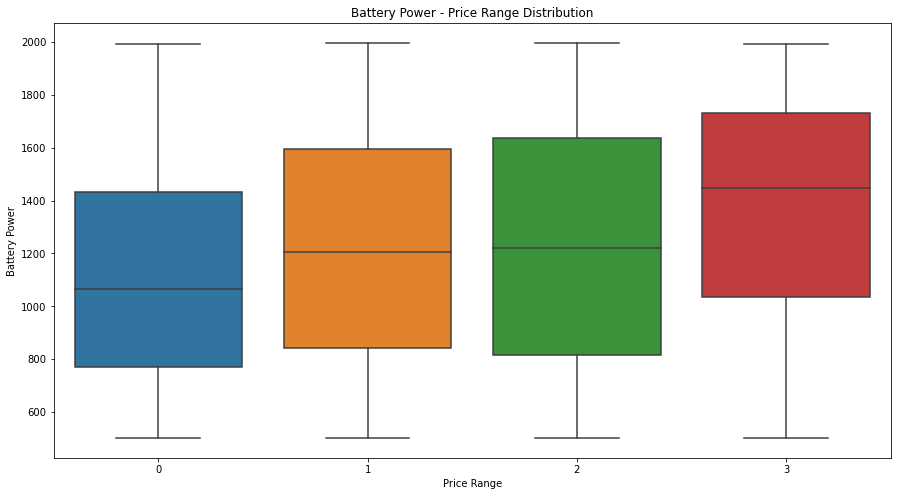

In [134]:
# Boxplot for Battery Power vs. Price_Range
sns.boxplot(x = 'price_range', y = 'battery_power', data = mobile_train)
# Plot labelling
plt.title('Battery Power - Price Range Distribution')
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
# Setting size of plot
fig = plt.gcf()
fig.set_size_inches(15,8)

#### 4. RAM - Battery Power - Price Range

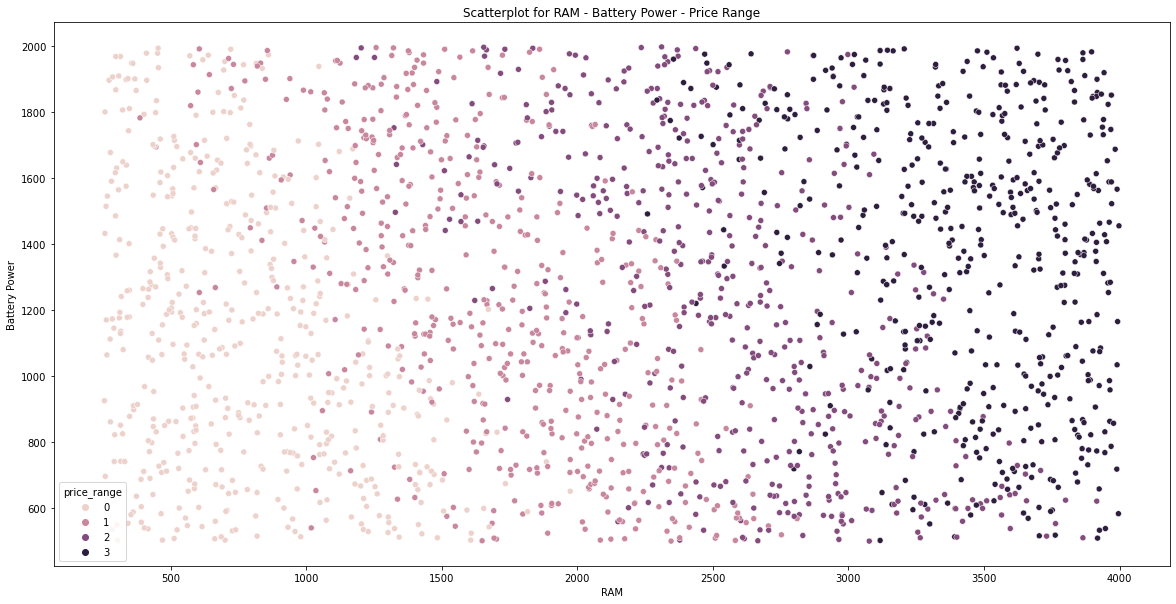

In [135]:
sns.scatterplot( x = mobile_train.ram, y = mobile_train.battery_power, hue = mobile_train.price_range)
plt.title('Scatterplot for RAM - Battery Power - Price Range')
plt.xlabel('RAM')
plt.ylabel('Battery Power')
fig = plt.gcf()
fig.set_size_inches(20,10)

#### 5. 3G - 4G
- Plot percentage of mobile phone enabled with 3G vs. percentage of mobile phone NOT enabled.
- Plot percentage of mobile phone enabled with 4G vs. percentage of mobile phone NOT enabled.

In [136]:
# Mobile phone enabled with 3G
values_3g = mobile_train['three_g'].value_counts()
labels_3g = ['3-G Supported', '3-G Not Supported']

# Mobile phone enabled with 3G
values_4g = mobile_train['four_g'].value_counts()
labels_4g = ['4-G Supported', '4-G Not Supported']

Text(0.5, 0, '4-G')

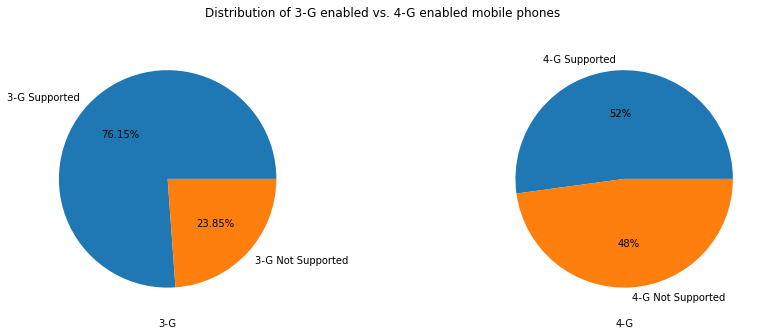

In [137]:
# Pie plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15, 5))
fig.suptitle('Distribution of 3-G enabled vs. 4-G enabled mobile phones')

# 3-G
ax1.pie(x = values_3g, labels = labels_3g, autopct='%.2f%%')
ax1.set_xlabel('3-G')

# 4-G
ax2.pie(x = values_4g, labels = labels_4g, autopct='%.f%%')
ax2.set_xlabel('4-G')

##  Pre-processing

#### 1. Train-test split

In [141]:
# Import
from sklearn.model_selection import train_test_split

In [307]:
# Separating 
X = mobile_train.iloc[:, 0:20]
y = mobile_train.iloc[:, 20]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

#### 2. Standardization

In [308]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [309]:
# Standardize X
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

##### Import libraries for model evaluation for classification

In [310]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.metrics import auc, roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score

## Modeling
1. Build the following baseline models
    - Logistic Regression
    - Decision Tree Classifier
    - Random Forest Classifier
    - Gradient Boosting Classifier
    - Support Vector Classifier
2. Build confusion matrix for all
3. Hyperparameter tuning for all models
4. Perform cross validation for all models
5. Model evaluation and comparison for all models using plots
6. Plot ROC-AUC for One-vs-Rest(OvR) for multiclass classification evaluation

In [311]:
# Import model libraries

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# Support Vector Machine
from sklearn.svm import SVC

### Baseline models using default hyperparameters

#### 1. Logistic Regression

In [312]:
# Fit
lr = LogisticRegression(random_state = 42).fit(X_train, y_train)
# Predict
lr_preds = lr.predict(X_test)

# Report
print('-------------CLASSIFICATION REPORT - LOGISTIC REGRESSION-------------')
print(classification_report(y_test, lr_preds))

-------------CLASSIFICATION REPORT - LOGISTIC REGRESSION-------------
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       132
           1       0.90      0.98      0.94       118
           2       0.99      0.92      0.95       120
           3       0.97      0.99      0.98       130

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



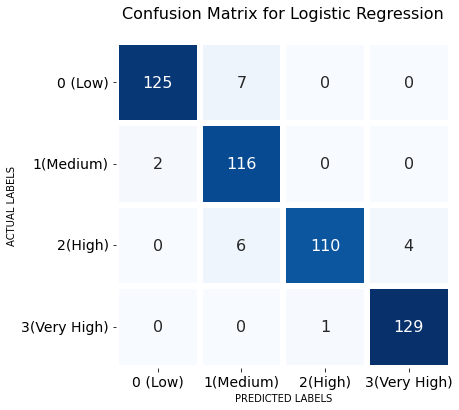

In [313]:
# Confusion matrix
cm_lr = confusion_matrix(y_test, lr_preds)

# Plot as a heatmap
df_lr = pd.DataFrame(columns = ['0 (Low)', '1(Medium)', '2(High)', '3(Very High)'], 
                     index = ['0 (Low)', '1(Medium)', '2(High)', '3(Very High)'], 
                     data = cm_lr)

# Heatmap for plotting confusion matrix
fig, ax = plt.subplots(figsize = (6,6))
sns.heatmap(df_lr, annot = True, cmap = 'Blues', fmt= '.0f',
            ax = ax, linewidths = 5, cbar = False, annot_kws = {"size": 16})

# Labeling
plt.title("Confusion Matrix for Logistic Regression\n", size = 16)
plt.xlabel('PREDICTED LABELS')
plt.xticks(size = 14)
plt.ylabel('ACTUAL LABELS')
plt.yticks(size = 14, rotation = 0)

plt.show()

#### 2. Decision Tree Classifier

In [314]:
# Fit
d_tree = DecisionTreeClassifier(max_depth = 3, random_state = 42).fit(X_train, y_train)

# Predict
dtree_preds = d_tree.predict(X_test)

# Report
print('-------------CLASSIFICATION REPORT - DECISION TREE CLASSIFIER-------------')
print(classification_report(y_test, dtree_preds))

-------------CLASSIFICATION REPORT - DECISION TREE CLASSIFIER-------------
              precision    recall  f1-score   support

           0       0.95      0.70      0.81       132
           1       0.59      0.83      0.69       118
           2       0.63      0.63      0.63       120
           3       0.86      0.77      0.81       130

    accuracy                           0.73       500
   macro avg       0.76      0.73      0.74       500
weighted avg       0.77      0.73      0.74       500



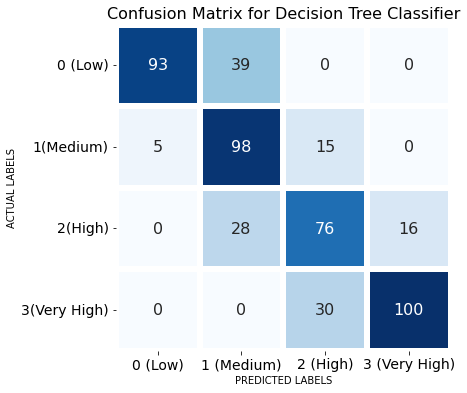

In [315]:
# Confusion matrix
cm_dtree = confusion_matrix(y_test, dtree_preds)

# Plot as a heatmap
df_dtree = pd.DataFrame(columns = ['0 (Low)', '1 (Medium)', '2 (High)', '3 (Very High)'], 
                        index = ['0 (Low)', '1(Medium)', '2(High)', '3(Very High)'], 
                        data = cm_dtree)

# Heatmap for plotting confusion matrix
fig, ax = plt.subplots(figsize = (6,6))
sns.heatmap(df_dtree, annot = True, cmap = 'Blues', fmt = '.0f',
            ax = ax, linewidths = 5, cbar = False, annot_kws = {'size': 16})


# Labeling
plt.title('Confusion Matrix for Decision Tree Classifier', size = 16)
plt.xlabel('PREDICTED LABELS')
plt.xticks(size = 14)
plt.ylabel('ACTUAL LABELS')
plt.yticks(size = 14, rotation = 0)
plt.show()

#### 3. Random Forest Classifier

In [316]:
# Fit
rf = RandomForestClassifier(max_depth = 4, random_state = 42).fit(X_train, y_train)

# Predict
rf_preds = rf.predict(X_test)

# Report
print('-------------CLASSIFICATION REPORT - RANDOM FOREST CLASSIFIER-------------')
print(classification_report(y_test, rf_preds))

-------------CLASSIFICATION REPORT - RANDOM FOREST CLASSIFIER-------------
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       132
           1       0.77      0.72      0.74       118
           2       0.75      0.68      0.71       120
           3       0.87      0.89      0.88       130

    accuracy                           0.82       500
   macro avg       0.81      0.81      0.81       500
weighted avg       0.82      0.82      0.82       500



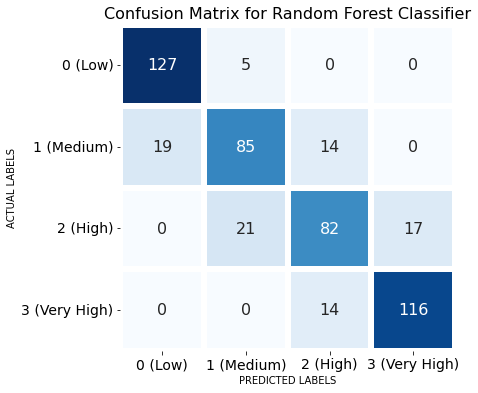

In [317]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, rf_preds)

# Plot as a heatmap
df_rf = pd.DataFrame(columns = ['0 (Low)', '1 (Medium)', '2 (High)', '3 (Very High)'], 
                     index = ['0 (Low)', '1 (Medium)', '2 (High)', '3 (Very High)'], 
                     data = cm_rf)

# Heatmap for plottinf confusion matrix
fig, ax = plt.subplots(figsize = (6,6))
sns.heatmap(df_rf, annot = True, cmap = 'Blues', cbar = False, fmt = '.0f', 
            ax = ax, linewidths = 5, annot_kws = {'size': 16})

# Labeling
plt.title('Confusion Matrix for Random Forest Classifier', size = 16)
plt.xlabel('PREDICTED LABELS')
plt.xticks(size = 14)
plt.ylabel('ACTUAL LABELS')
plt.yticks(size = 14, rotation = 0)
plt.show()

#### 4. Gradient Boosting Classifier

In [318]:
# Fit
gradient_boost = GradientBoostingClassifier().fit(X_train, y_train)

# Predict
gradient_boost_preds = gradient_boost.predict(X_test)

# Report
print('-------------CLASSIFICATION REPORT - GRADIENT BOOST CLASSIFIER-------------')
print(classification_report(y_test, gradient_boost_preds))

-------------CLASSIFICATION REPORT - GRADIENT BOOST CLASSIFIER-------------
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       132
           1       0.84      0.86      0.85       118
           2       0.84      0.85      0.85       120
           3       0.94      0.92      0.93       130

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500



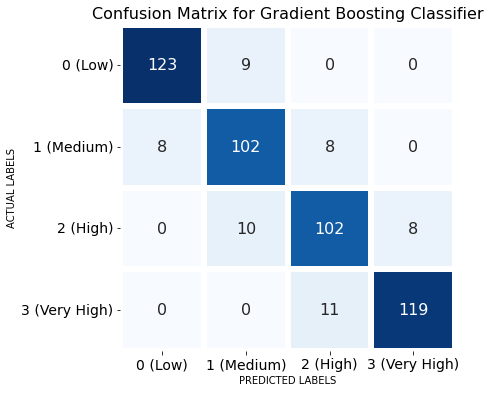

In [319]:
# Confusion Matrix
cm_gb = confusion_matrix(y_test, gradient_boost_preds)

# Plot as a heatmap
df_gb = pd.DataFrame(columns = ['0 (Low)', '1 (Medium)', '2 (High)', '3 (Very High)'], 
                     index = ['0 (Low)', '1 (Medium)', '2 (High)', '3 (Very High)'], 
                     data = cm_gb)

# Heatmap for plottinf confusion matrix
fig, ax = plt.subplots(figsize = (6,6))
sns.heatmap(df_gb, annot = True, cmap = 'Blues', cbar = False, fmt = '.0f', 
            ax = ax, linewidths = 5, annot_kws = {'size': 16})

# Labeling
plt.title('Confusion Matrix for Gradient Boosting Classifier', size = 16)
plt.xlabel('PREDICTED LABELS')
plt.xticks(size = 14)
plt.ylabel('ACTUAL LABELS')
plt.yticks(size = 14, rotation = 0)
plt.show()

#### 5. Support Vector Classifier

In [320]:
# Fit
svc = SVC().fit(X_train, y_train)

# Predict
svc_preds = svc.predict(X_test)

# Report
print('-------------CLASSIFICATION REPORT - SUPPORT VECTOR CLASSIFIER-------------')
print(classification_report(y_test, svc_preds))

-------------CLASSIFICATION REPORT - SUPPORT VECTOR CLASSIFIER-------------
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       132
           1       0.76      0.85      0.80       118
           2       0.82      0.81      0.81       120
           3       0.95      0.90      0.92       130

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.87      0.86      0.87       500



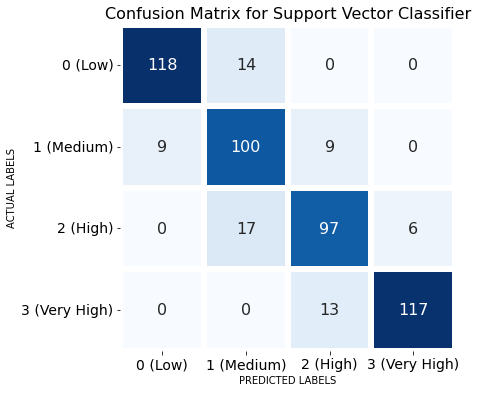

In [321]:
# Confusion Matrix
cm_svc = confusion_matrix(y_test, svc_preds)

# Plot as a heatmap
df_svc = pd.DataFrame(columns = ['0 (Low)', '1 (Medium)', '2 (High)', '3 (Very High)'], 
                     index = ['0 (Low)', '1 (Medium)', '2 (High)', '3 (Very High)'], 
                     data = cm_svc)

# Heatmap for plottinf confusion matrix
fig, ax = plt.subplots(figsize = (6,6))
sns.heatmap(df_svc, annot = True, cmap = 'Blues', cbar = False, fmt = '.0f', 
            ax = ax, linewidths = 5, annot_kws = {'size': 16})

# Labeling
plt.title('Confusion Matrix for Support Vector Classifier', size = 16)
plt.xlabel('PREDICTED LABELS')
plt.xticks(size = 14)
plt.ylabel('ACTUAL LABELS')
plt.yticks(size = 14, rotation = 0)
plt.show()

### Hyperparameter Tuning - Cross Validation

We perform `Grid Search` method on the following models:
- Logistic Regression
- Decision Tree Classifier
- Gradient Boosting Classifier
- Support Vector Classifier

We perform `Randomized Search` method on:
- Random Forest
    - This model has a large number of hyperparamters, not all as equally important
    - With Grid Search the tuning process becomes more computationally intensive as the number of hyperparameters increase, since we build a model for each possible combination of all of the hyperparameter values provided
    - Hence, randomized search is more effiecient in this case

##### Stratified K-Fold Cross Validation
- E.g., Say, there are 16 data points with 12 of them belonging to class 1 and remaining 4 belonging to class 0 (an imbalanced class distribution)
    - The ratio of class 0 to class 1 is 1/3
    - If we set k = 4, then the test sets include three data points from class 1 and one data point from class 0
    - Thus, training sets include three data points from class 0 and nine data points from class 1
    - `The class distribution in the dataset is preserved in the training and test splits with StratifiedKFold`
- In classifications tasks with imbalanced class distributions, we should prefer [StratifiedKFold](https://towardsdatascience.com/how-to-train-test-split-kfold-vs-stratifiedkfold-281767b93869) over KFold

In [350]:
# Import libraries for hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

import warnings
warnings.filterwarnings("ignore")

In [351]:
# Logistic Regression Parameters
log_reg_param_grid = {'penalty': ['l1', 'l2'], 
                      'C': [0.0001, 0.0001, 0.001, 0.01, 1, 10, 100],
                      'solver': ['lbfgs', 'liblinear']}

In [352]:
# Decision Tree Classifier Parameters
dtree_param_grid = {'max_depth': range(1, 20, 2), 
                    'min_samples_split': range(10, 100, 5), 
                    'criterion': ['gini', 'entropy', 'log_loss']}

In [353]:
# Random Forest Classifier

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 5)] # Generate 10 samples between 10 and 200

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None) # [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]


# Minimum number of samples required to split a node
min_samples_split = [5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
rf_param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [354]:
# Gradient Boosting Classifier
gradient_boost_param_grid = {'learning_rate': [0.05, 0.1, 0.2], 
                             'min_samples_split': [2, 4, 6, 8, 10], 
                             'min_samples_leaf': [1, 5, 10]}

In [355]:
# Support Vector Classifier
svc_param_grid = {'C': [0.1, 1, 10 ], 
                  'kernel': ['linear', 'poly', 'rbf'], 
                  'gamma': ['scale', 'auto']}

Putting all classifiers in a list to run Grid Search on 4 models in a loop. Append Random Forest Model in the classifier list later and run Randomized Search separately.

In [356]:
# Loop through all models with gridsearchCV hyperparameter tuning

# List all models
classifiers = [LogisticRegression(random_state = 42), 
               DecisionTreeClassifier(random_state = 42), 
               GradientBoostingClassifier(random_state = 42), 
               SVC(random_state = 42, probability = True)] # probability = False by default, use probability = True to calculate ROC-AUC score for SVC

# List corresponding parameters
classifier_params = [log_reg_param_grid, dtree_param_grid, gradient_boost_param_grid, svc_param_grid]

# Empty lists to append evaluation metrics
cv_scores = []
best_estimators = []
roc_auc_scores = []
recall_scores = []
precision_scores = []
f1_scores = []

In [357]:
# Loop
for i in range(len(classifiers)):
    print('--------------------------------------------------------------------')
    
    # GridSearch
    classify = GridSearchCV(classifiers[i], param_grid = classifier_params[i], cv = StratifiedKFold(n_splits = 10), n_jobs = -1)
    classify.fit(X_train, y_train)
    
    # Append evaluation metrics to list
    # CV score
    cv_scores.append(classify.best_score_)
    # Best estimator
    best_estimators.append(classify.best_estimator_)
    # ROC-AUC scores ==> Use .predict_proba() 
    roc_auc_scores.append(roc_auc_score(y_test, classify.predict_proba(X_test), multi_class='ovr'))
    # Recall scores
    recall_scores.append(recall_score(y_test, classify.predict(X_test), average='weighted'))
    # Precision scores
    precision_scores.append(precision_score(y_test, classify.predict(X_test), average='weighted'))
    # F-1 Scores
    f1_scores.append(f1_score(y_test, classify.predict(X_test), average='weighted'))
    
    # Print metric values
    print("Model: {}".format(classifiers[i]))
    print("Accuracy (CV Score): {}%".format(round(cv_scores[i]*100, 2)))
    print("ROC-AUC: {}".format(roc_auc_scores[i]))
    print("Recall: {}".format(recall_scores[i]))
    print("Precision: {}".format(precision_scores[i]))
    print("F1-Score: {}".format(f1_scores[i]))
    print("Best Estimator: {}".format(classify.best_estimator_))
    
    print('--------------------------------------------------------------------')

--------------------------------------------------------------------
Model: LogisticRegression(random_state=42)
Accuracy (CV Score): 96.6%
ROC-AUC: 0.999346107313742
Recall: 0.97
Precision: 0.9714343884832394
F1-Score: 0.9700946369077402
Best Estimator: LogisticRegression(C=100, random_state=42)
--------------------------------------------------------------------
--------------------------------------------------------------------
Model: DecisionTreeClassifier(random_state=42)
Accuracy (CV Score): 84.47%
ROC-AUC: 0.9354237600056129
Recall: 0.862
Precision: 0.8646224344645397
F1-Score: 0.8622456932054634
Best Estimator: DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_split=15,
                       random_state=42)
--------------------------------------------------------------------
--------------------------------------------------------------------
Model: GradientBoostingClassifier(random_state=42)
Accuracy (CV Score): 91.33%
ROC-AUC: 0.9858205550806096
Recall: 

In [358]:
# Random Forest
classifiers.append(RandomForestClassifier(random_state = 42))
classifier_params.append(rf_param_grid)
print('--------------------------------------------------------------------')
    
# Randomized Search 
classify_rf = RandomizedSearchCV(estimator = classifiers[-1], param_distributions = classifier_params[-1], cv = StratifiedKFold(n_splits = 10), n_jobs = -1)
classify_rf.fit(X_train, y_train)

# Append evaluation metrics to list
# CV score
cv_scores.append(classify_rf.best_score_)
# Best estimator
best_estimators.append(classify_rf.best_estimator_)
# ROC-AUC scores ==> Use .predict_proba() 
roc_auc_scores.append(roc_auc_score(y_test, classify_rf.predict_proba(X_test), multi_class='ovr'))
# Recall scores
recall_scores.append(recall_score(y_test, classify_rf.predict(X_test), average='weighted'))
# Precision scores
precision_scores.append(precision_score(y_test, classify_rf.predict(X_test), average='weighted'))
# F-1 Scores
f1_scores.append(f1_score(y_test, classify_rf.predict(X_test), average='weighted'))
    
# Print metric values
print("Model: {}".format(classifiers[-1]))
print("Accuracy (CV Score): %{}".format(round(cv_scores[-1]*100, 2)))
print("ROC-AUC: {}".format(roc_auc_scores[-1]))
print("Recall: {}".format(recall_scores[-1]))
print("Precision: {}".format(precision_scores[-1]))
print("F1-Score: {}".format(f1_scores[-1]))
print("Best Estimator: {}".format(classify_rf.best_estimator_))
    
print('--------------------------------------------------------------------')

--------------------------------------------------------------------
Model: RandomForestClassifier(random_state=42)
Accuracy (CV Score): %87.6
ROC-AUC: 0.9816472069855419
Recall: 0.88
Precision: 0.881309918699187
F1-Score: 0.8804780733870311
Best Estimator: RandomForestClassifier(bootstrap=False, max_depth=20, max_features='auto',
                       min_samples_leaf=4, min_samples_split=5,
                       n_estimators=152, random_state=42)
--------------------------------------------------------------------


In [359]:
# Dataframe with metrics
tuned_report_df = pd.DataFrame({'Accuracy (CV Score)': cv_scores, 
                                'ROC-AUC': roc_auc_scores,
                                'Recall': recall_scores, 
                                'Precision': precision_scores, 
                                'F1-Score': f1_scores, 
                                'Models': ['Logistic Regression', 
                                           'Decision Tree Classifier', 
                                           'Gradient Boosting Classifier', 
                                           'Support Vector Classifier', 
                                           'Random Forest Classifier']})

In [360]:
# Plotting the evaluation metrics as a heatmap
tuned_report_df.index = tuned_report_df['Models']
tuned_report_df = tuned_report_df.drop(['Models'], axis = 1)

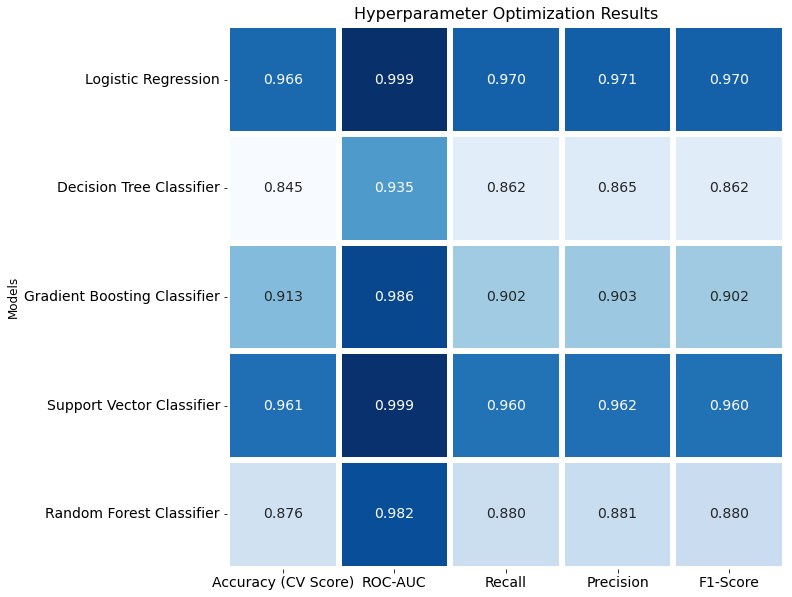

In [361]:
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(tuned_report_df, annot = True, cbar = False, cmap = 'Blues', annot_kws = {'size': 14}, ax = ax, linewidths = 5, fmt = '.3f')
plt.xticks(size = 14)
plt.yticks(size = 14, rotation = 0)
plt.ylabel("Models", size =12)
plt.title("Hyperparameter Optimization Results", size = 16)
plt.show()

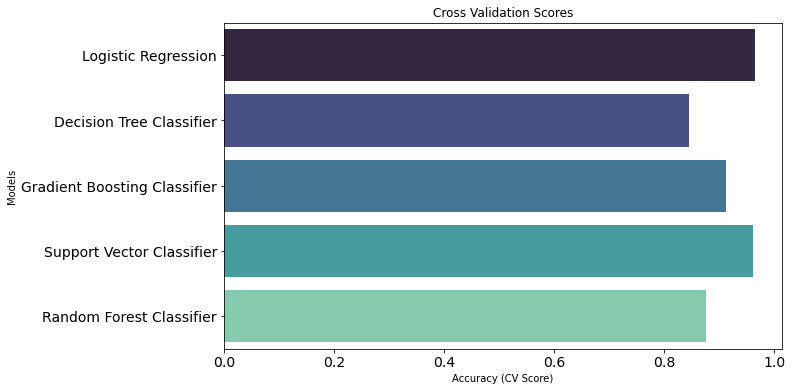

In [362]:
# Plotting Cross-validation scores
cv_result = pd.DataFrame({'Cross Validation Scores': cv_scores, 
                          'Models': ['Logistic Regression', 
                                     'Decision Tree Classifier', 
                                     'Gradient Boosting Classifier', 
                                     'Support Vector Classifier', 
                                     'Random Forest Classifier']})
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot('Cross Validation Scores', 'Models', data = cv_result, palette = 'mako')
plt.title('Cross Validation Scores')
plt.xlabel('Accuracy (CV Score)')
plt.xticks(size = 14)
plt.ylabel('Models')
plt.yticks(size = 14, rotation = 0)
plt.show()

Best performing models with respect to cross validation score are **Logistic Regression** and **Support Vector Classifier**. 

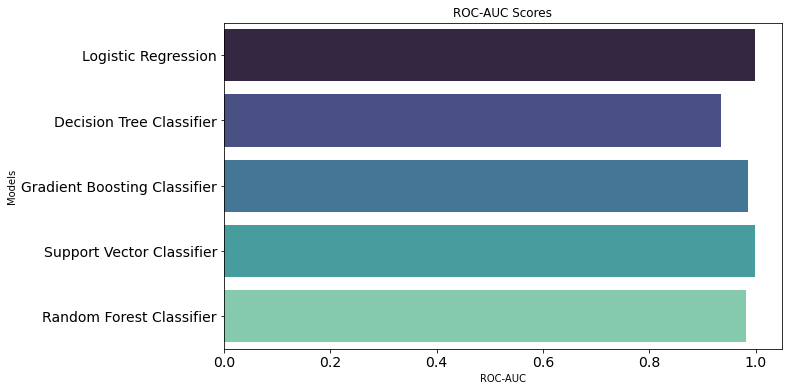

In [366]:
# Plotting ROC-AUC scores
auc_result = pd.DataFrame({'ROC-AUC Scores': roc_auc_scores, 
                          'Models': ['Logistic Regression', 
                                     'Decision Tree Classifier', 
                                     'Gradient Boosting Classifier', 
                                     'Support Vector Classifier', 
                                     'Random Forest Classifier']})
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot('ROC-AUC Scores', 'Models', data = auc_result, palette = 'mako')
plt.title('ROC-AUC Scores')
plt.xlabel('ROC-AUC')
plt.xticks(size = 14)
plt.ylabel('Models')
plt.yticks(size = 14, rotation = 0)
plt.show()

Again, **logistic regression** and **SVC** models are the best performers here. 

In [363]:
# Fit
best_classifier = LogisticRegression(C=100, random_state=42).fit(X_train, y_train)

# Predict
best_classifier_preds = best_classifier.predict(X_test)

# Report
print('-------------CLASSIFICATION REPORT - HYPERPARAMETER TUNED LOGISTIC REGRESSION-------------')
print(classification_report(y_test, best_classifier_preds))

-------------CLASSIFICATION REPORT - HYPERPARAMETER TUNED LOGISTIC REGRESSION-------------
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       132
           1       0.92      1.00      0.96       118
           2       0.98      0.94      0.96       120
           3       0.98      0.98      0.98       130

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



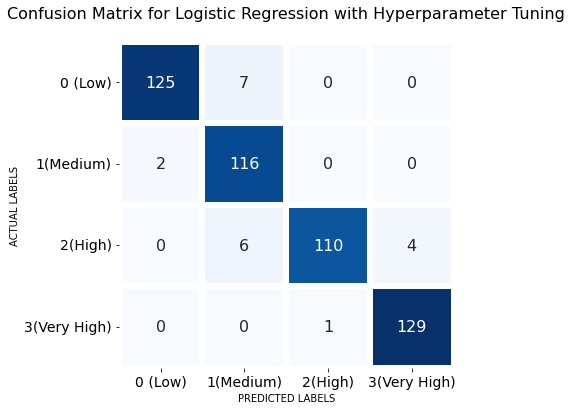

In [364]:
# Confusion matrix
cm_best = confusion_matrix(y_test, best_classifier_preds)

# Plot as a heatmap
df_best = pd.DataFrame(columns = ['0 (Low)', '1(Medium)', '2(High)', '3(Very High)'], 
                     index = ['0 (Low)', '1(Medium)', '2(High)', '3(Very High)'], 
                     data = cm_lr)

# Heatmap for plotting confusion matrix
fig, ax = plt.subplots(figsize = (6,6))
sns.heatmap(df_best, annot = True, cmap = 'Blues', fmt= '.0f',
            ax = ax, linewidths = 5, cbar = False, annot_kws = {"size": 16})

# Labeling
plt.title("Confusion Matrix for Logistic Regression with Hyperparameter Tuning\n", size = 16)
plt.xlabel('PREDICTED LABELS')
plt.xticks(size = 14)
plt.ylabel('ACTUAL LABELS')
plt.yticks(size = 14, rotation = 0)
plt.show()

### ROC-AUC Curve
####  [Multiclass classification evaluation](https://towardsdatascience.com/multiclass-classification-evaluation-with-roc-curves-and-roc-auc-294fd4617e3a)
Adapting the most used classification evaluation metric to the multiclass classification problem with **OvR** and **OvO** strategies.
- When evaluating Multiclass Classification models, we need to adapt the metrics used in Binary Classification to work in this setting
- ROC curve and ROC-AUC score are important tools to evaluate binary classification models
- The show us the separability of the classes by all possible thresholds
    - `How well the mmodel is classifying each class`
    - We compare the ROC Curves with their respective histograms - `the more separate the histograms are, the better the ROC Curves are as well`
- The concept is not immediately applicable for multiclass classfiers
     - In order to use ROC curves and ROC AUC, we need another way to compare classes
         - One-vs-Rest (OvR) 
         - One-vs-One (OvO)

##### One-vs-Rest
- OvR is a method to evaluate multiclass models by `comparing each class against all the others at the same time`
- In this scenario, we take one class and consider it as our *positive* class, while all the others are considered as the *negative* class
- By doing this, we reduce the multiclass classification output into a binary classification one
    - Now, it is possible to use all the known binary classification metrics for evaluation
- This process is repeated for each class present in the data
    - Say we have a 3-class dataset
    - Here we get 3 different OvR scores
    - In the end, we can average (simple/weighted) them to have a final OvR model score

##### One-vs-One
- We compare all possible 2-class combinations of the dataset
- Say we have a 3-class dataset
- We chose the combination Class-1 vs Class-2 as the first one
    - We get the copy of the dataset that only contains the two classes and discard all the others
    - We define observations with real class = 'Class 1' as our positive class and the real class = 'Class2' as our negative class
    - Now the problem is binary and can be evaluated using all binary classification metrics
- **NOTE:** *Class1 vs Class2* is different than *Class2 vs Class1*
- Total combinations for 3-class classification = 3P2 = 6
- Total combinations for 4-class classification = 4P2 = 12

### Using the best estimator model for multiclass classification

##### Label Binarize 
- Binarize labels in a one-vs-all fashion
- Several regression and binary classification algorithms are available in the scikit
- A simple way to extend these algorithms to the multi-class classification case is to use the so-called one-vs-all scheme

In [367]:
from sklearn.preprocessing import label_binarize

In [368]:
# Separating 
X = mobile_train.iloc[:, 0:20]
y = mobile_train.iloc[:, 20]

# Label_binarizer
y = label_binarize(y, classes = [0, 1, 2, 3])
n_classes = 4

In [369]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [370]:
# Standardize
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [371]:
# OneVsRestClassifier
from sklearn.multiclass import OneVsRestClassifier

best_classify = OneVsRestClassifier(best_estimators[0]) # best_estimators[0] = LogisticRegression(C=100, random_state=42)
y_score = best_classify.fit(X_train, y_train).decision_function(X_test)

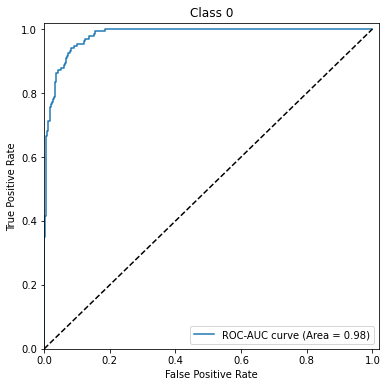

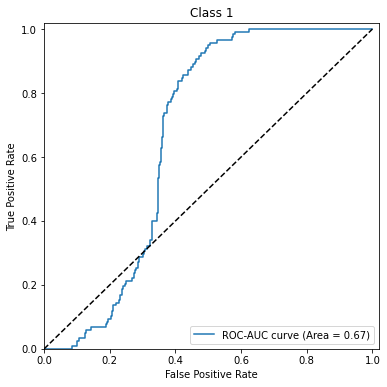

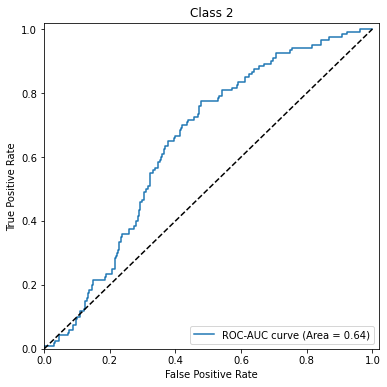

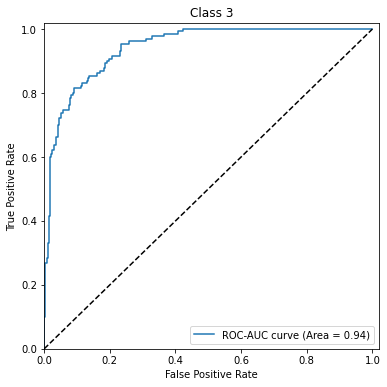

In [380]:
# Plotting ROC-AUC

# Define empty dictionaries to store values for each class
false_positive_rate = dict()
true_positive_rate = dict()
thresholds  = dict()
roc_auc = dict()

# Loop through all classes
for i in range(n_classes):
    false_positive_rate[i], true_positive_rate[i], thresholds[i] = roc_curve( y_test[:, i], y_score[:, i])
    # ROC - AUC values
    roc_auc[i] = auc(false_positive_rate[i], true_positive_rate[i])
    
# Plot
for i in range(n_classes):
    plt.figure(figsize = (6,6))
    plt.plot(false_positive_rate[i], true_positive_rate[i], label = 'ROC curve (Area = %0.2f)'% roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0, 1.02])
    plt.ylim([0, 1.02])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class %0.f'%i)
    plt.legend(loc = 'lower right')
    plt.show()

### Conclusion
- Classes 0 and 3 have a very good ROC-AUC score of 0.98 and 0.94 respectively
- `The Logistic Regression Model is good at separating the two classes (0 and 3), i.e., separating Low range mobile phones to Very high range mobile phones`
- Medium range (Class 1) and High range (Class 2) mobile phones have an average ROC-AUC score of approx. 0.65